In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
user_df = pd.read_csv('./user_window.csv', encoding='CP949')

# 컬럼별 데이터 확인

## user table

In [3]:
user_df.isnull().sum()

Unnamed: 0                   0
user_idx                     0
status                       0
third_party_join_type    21351
joined_date                  0
dtype: int64

In [4]:
user_df['third_party_join_type'].value_counts()

a7e2ede7f71331bc36e67997c7fc258b14be5e9c3c5c964fc0a1bbba8cd5a80d    2
a0ec0b63d8417c620253e2183f6b9387761482e9b0fed2ca67f94b924a5d5f15    2
11171698d229b357fd2a20cb9fc3bae1887b49170a455c4c8fa11ead65203d10    2
45f0c7852b74b103709980820914bcec3e8f1763d35c7666afcd4a234d67f778    2
97958f037a0201f0315ba44a51d9de3e74c3f217833b98a34a6d0e9620392b9a    2
                                                                   ..
5c03e9cce6fa7cc97beb070672fdd6ba9ea16e9d6b65fbf000aa6f8ff3cfe9a1    1
aecfe9133f5151e2248e14863491effb0004156bcce51cf508141e10be49f2a6    1
669f001fd7d30417a6ce565db4308545693c60fb153af5c3cf2eb2eebf2dcbbc    1
2cac4b811d0830b8c9860eb67865f59d6c8518e92695134cc5cf3d6bba3523ed    1
df4325b5bc30886f1aafb94efcab077c53bc5c96cb8fa56b6d46f0d5c4285b7c    1
Name: third_party_join_type, Length: 2331, dtype: int64

In [5]:
user_df['third_party_join_type'] = user_df['third_party_join_type'].fillna('X')
user_df['third_party_join_type'][user_df['third_party_join_type'] != 'X'] = 'O'

In [6]:
user_df.isnull().sum()

Unnamed: 0               0
user_idx                 0
status                   0
third_party_join_type    0
joined_date              0
dtype: int64

## payment table

In [7]:
payment_df = pd.read_csv('./payment_window.csv', encoding='CP949')

In [8]:
payment_df.isnull().sum()

Unnamed: 0               0
user_idx                 0
subscription_type       31
cart_discount_price      0
order_shipping_price     0
order_total_price        0
paid_date                0
dtype: int64

In [9]:
payment_df['subscription_type'].value_counts()

구독    7277
Name: subscription_type, dtype: int64

In [10]:
payment_df['subscription_type'] = payment_df['subscription_type'].fillna('O')
payment_df['subscription_type'][payment_df['subscription_type'] != 'O'] = 'X'

In [11]:
payment_df.isnull().sum()

Unnamed: 0              0
user_idx                0
subscription_type       0
cart_discount_price     0
order_shipping_price    0
order_total_price       0
paid_date               0
dtype: int64

## bra table

In [12]:
bra_df = pd.read_csv('./bra_size_window.csv', encoding='CP949')

In [13]:
bra_df.isnull().sum()

Unnamed: 0       0
user_idx         0
size            12
created_date     0
dtype: int64

In [14]:
bra_df['size'].value_counts()

75A           2529
75B           2418
75C           1577
80B           1409
80A           1294
              ... 
82/11            1
3.2              1
90AA             1
알수없음(67/7)       1
밑가슴둘레가 더 큼       1
Name: size, Length: 67, dtype: int64

In [15]:
bra_df['size'] = bra_df['size'].fillna('X')

In [16]:
bra_df.isnull().sum()

Unnamed: 0      0
user_idx        0
size            0
created_date    0
dtype: int64

## 통합

In [17]:
total_inner_df = pd.DataFrame()
pay_bra_df = pd.merge(payment_df, bra_df, how='inner', on='user_idx')
total_inner_df = pd.merge(pay_bra_df, user_df, how='inner', on='user_idx')
drop_cols = ['Unnamed: 0_x', 'Unnamed: 0', 'Unnamed: 0_y']
total_inner_df.drop(drop_cols, axis=1, inplace=True)
total_inner_df.reset_index(drop=True, inplace=True)

total_inner_df['paid_date'] = pd.to_datetime(total_inner_df['paid_date'])
total_inner_df['joined_date'] = pd.to_datetime(total_inner_df['joined_date'])
total_inner_df['created_date'] = pd.to_datetime(total_inner_df['created_date'])

In [18]:
total_inner_df.shape

(6711, 11)

In [19]:
total_outer_df = pd.DataFrame()
pay_bra_df = pd.merge(payment_df, bra_df, how='outer', on='user_idx')
total_outer_df = pd.merge(pay_bra_df, user_df, on='user_idx')
drop_cols = ['Unnamed: 0_x', 'Unnamed: 0', 'Unnamed: 0_y']
total_outer_df.drop(drop_cols, axis=1, inplace=True)
total_outer_df.reset_index(drop=True, inplace=True)

total_outer_df['paid_date'] = pd.to_datetime(total_outer_df['paid_date'])
total_outer_df['joined_date'] = pd.to_datetime(total_outer_df['joined_date'])
total_outer_df['created_date'] = pd.to_datetime(total_outer_df['created_date'])

In [20]:
total_outer_df.shape

(17199, 11)

## user_id 번호로 바꾸기

In [44]:
total_inner_not_duplicate = total_inner_df.drop_duplicates(keep='first').reset_index().reset_index().rename(columns={'level_0':'user_id'})
total_inner_df = total_inner_df.merge(total_inner_not_duplicate[['user_id', 'user_idx']], how='left', on='user_idx')

In [45]:
total_inner_df.isnull().sum()

user_idx                 0
subscription_type        0
cart_discount_price      0
order_shipping_price     0
order_total_price        0
paid_date                0
size                     0
created_date             0
status                   0
third_party_join_type    0
joined_date              0
user_id                  0
dtype: int64

## 그래프로 보기

In [46]:
total_inner_df.groupby('paid_date').sum().head()

,cart_discount_price,order_shipping_price,order_total_price,status,user_id
paid_date,,,,,
2020-08-31,0,3000,18000,0,1518
2020-09-07,5100,3000,12900,0,4790
2020-09-09,40200,6000,25800,0,12612
2020-09-10,10200,6000,25800,0,3793
2020-09-11,30000,0,0,0,1793


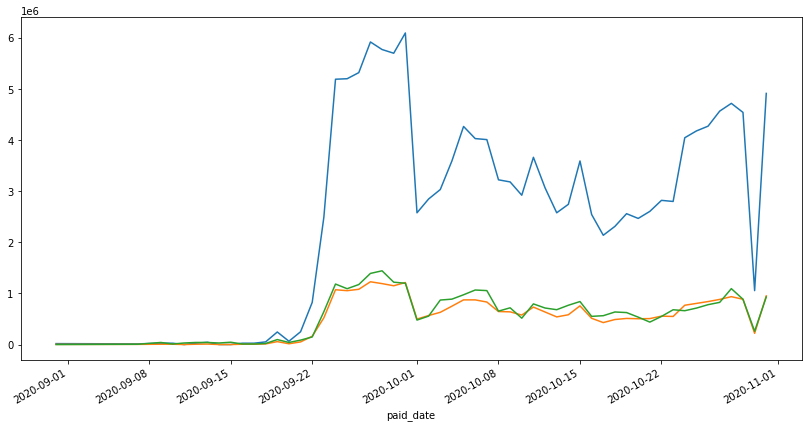

In [47]:
plt.figure(figsize=(14,7))
total_inner_df.groupby('paid_date').sum()['order_total_price'].plot()
total_inner_df.groupby('paid_date').sum()['order_shipping_price'].plot()
total_inner_df.groupby('paid_date').sum()['cart_discount_price'].plot()
plt.show()

In [24]:
total_inner_df.groupby('paid_date').sum().corr().style.background_gradient(cmap='winter_r')

,cart_discount_price,order_shipping_price,order_total_price,status
cart_discount_price,1.000000,0.986376,0.980447,0.447311
order_shipping_price,0.986376,1.000000,0.999310,0.412141
order_total_price,0.980447,0.999310,1.000000,0.398257
status,0.447311,0.412141,0.398257,1.000000


# AARRR

## A(Acquisition)

In [125]:
total_inner_df['joined_date_date'] = total_inner_df['joined_date'].dt.date
total_inner_df['created_date_date'] = total_inner_df['created_date'].dt.date
total_inner_df['paid_date_date'] = total_inner_df['paid_date'].dt.date



total_inner_df['joined_date_month'] = total_inner_df['joined_date'].dt.month
total_inner_df['created_date_month'] = total_inner_df['created_date'].dt.month
total_inner_df['paid_date_month'] = total_inner_df['paid_date'].dt.month

In [126]:
# joined_date 기준
joined_dt = total_inner_df.groupby('joined_date_date').sum()
user_id_count_df = total_inner_df.groupby('joined_date_date')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
joined_dt = joined_dt.drop('user_id', axis=1)
joined_dt = joined_dt.merge(user_id_count_df, left_index=True, right_index=True)
# month
joined_month_dt = total_inner_df.groupby('joined_date_month').sum()
user_id_count_df = total_inner_df.groupby('joined_date_month')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
joined_month_dt = joined_month_dt.merge(user_id_count_df, left_index=True, right_index=True)

# created_date 기준
created_dt = total_inner_df.groupby('created_date_date').sum()
user_id_count_df = total_inner_df.groupby('created_date_date')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
created_dt = created_dt.drop('user_id', axis=1)
created_dt = created_dt.merge(user_id_count_df, left_index=True, right_index=True)
# month
created_month_dt = total_inner_df.groupby('created_date_month').sum()
user_id_count_df = total_inner_df.groupby('created_date_month')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
created_month_dt = created_month_dt.merge(user_id_count_df, left_index=True, right_index=True)

# paid_date 기준
paid_dt = total_inner_df.groupby('paid_date_date').sum()
paid_id_count_df = total_inner_df.groupby('paid_date_date')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
paid_dt = paid_dt.drop('user_id', axis=1)
paid_dt = paid_dt.merge(user_id_count_df, left_index=True, right_index=True)
# month
paid_month_dt = total_inner_df.groupby('paid_date_month').sum()
paid_id_count_df = total_inner_df.groupby('paid_date_month')[['user_id']].count().rename(columns={'user_id':'user_id_count'})
paid_month_dt = paid_month_dt.merge(user_id_count_df, left_index=True, right_index=True)

In [133]:
paid_dt

,cart_discount_price,order_shipping_price,order_total_price,status,joined_date_month,created_date_month,paid_date_month,user_id_count


### 일별 가입자 수

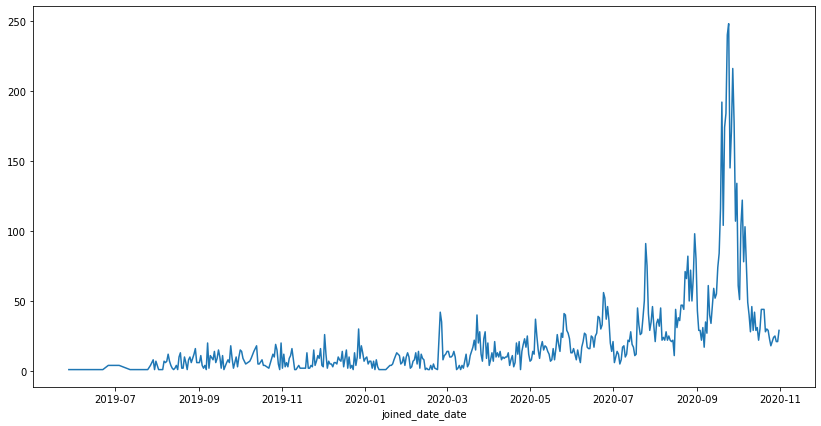

In [127]:
plt.figure(figsize=(14,7))
joined_dt['user_id_count'].plot()
plt.show()

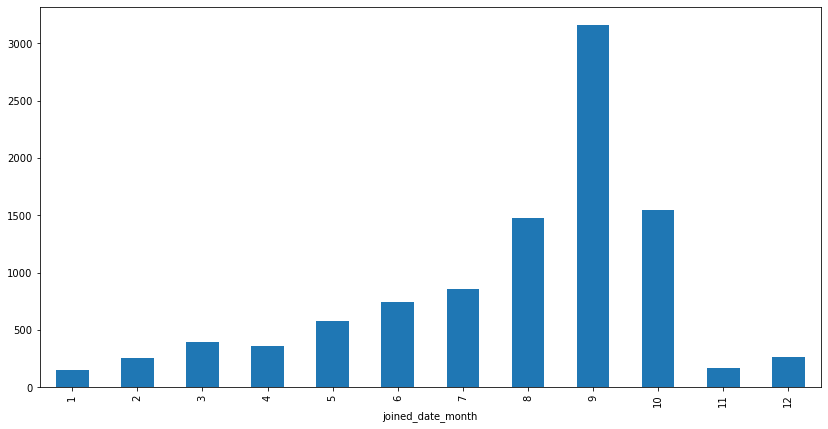

In [128]:
plt.figure(figsize=(14,7))
joined_month_dt['user_id_count'].plot(kind='bar')
plt.show()

### 일별 가슴사이즈 입력 수

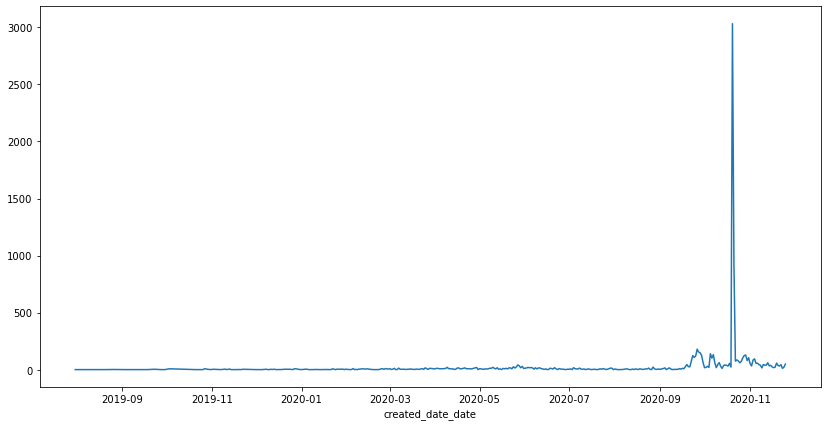

In [129]:
plt.figure(figsize=(14,7))
created_dt['user_id_count'].plot()
plt.show()

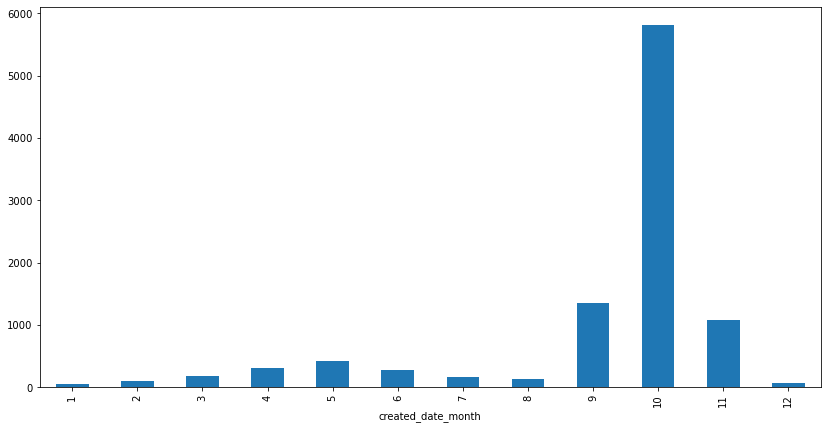

In [130]:
plt.figure(figsize=(14,7))
created_month_dt['user_id_count'].plot(kind='bar')
plt.show()

### 일별 매출액

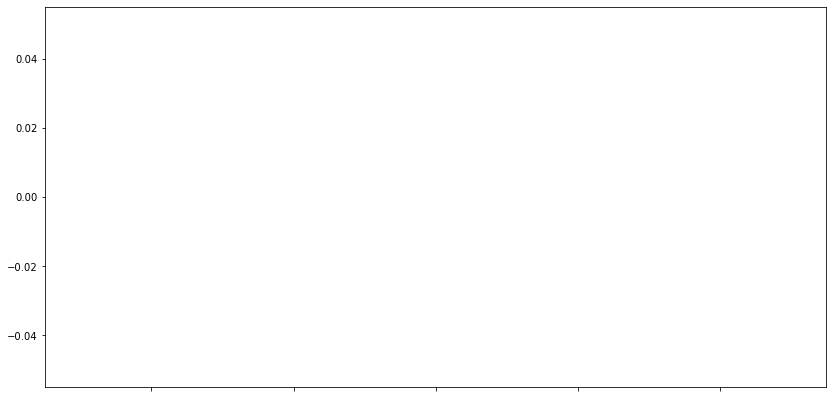

In [134]:
plt.figure(figsize=(14,7))
paid_dt['user_id_count'].plot()
plt.show()

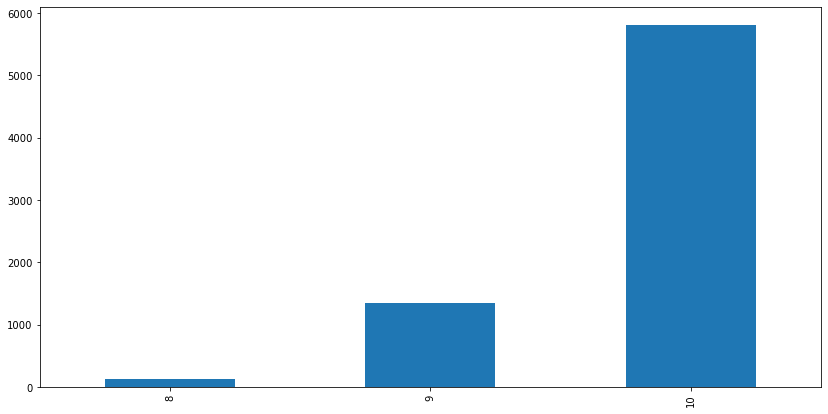

In [132]:
plt.figure(figsize=(14,7))
paid_month_dt['user_id_count'].plot(kind='bar')
plt.show()

In [ ]:
###